# Telco Customer Churn
Fonte: Kaggle

Análise do dataset 06/06/2021


**Objetivo:**

    O objetivo do projeto é elaborar um modelo que consiga prever os usuários propensos a cancelar o produto (Churn).
    
    Nesse segundo jupyter, é realizado o tratamento de valores faltantes, codificação de variáveis categóricas e remoção de features do dataset Telco Custumor Churn, disponível no Kaggle. 
    
**Indice:**
    

Abaixo é apresentada a lista das variáveis existentes no dataset e a explicação delas.


**Lista das Variáveis:**

| Variável 	| Explicação 	|
|:-:	|:-:	|
| Gender 	| Whether   the customer is a male or a female 	|
| SeniorCitizen 	| Whether the   customer is a senior citizen or not (1, 0) 	|
| Partner 	| Whether the customer has a partner or   not (Yes, No) 	|
| Dependents 	| Whether the customer   has dependents or not (Yes, No) 	|
| tenure 	| Number of months the   customer has stayed with the company 	|
| PhoneService 	| Whether the customer   has a phone service or not (Yes, No) 	|
| MultipleLines 	| Whether the customer has multiple   lines or not (Yes, No, No phone service) 	|
| InternetService 	| Customer’s internet service provider   (DSL, Fiber optic, No) 	|
| OnlineSecurity 	|     Whether   the customer has online security or not (Yes, No, No internet service)                              	|
| OnlineBackup 	| Whether the customer   has online backup or not (Yes, No, No internet service) 	|
| DeviceProtection 	| Whether the customer   has device protection or not (Yes, No, No internet service) 	|
| TechSupport 	| Whether the customer has tech support   or not (Yes, No, No internet service) 	|
| StreamingTV 	| Whether the customer has streaming TV   or not (Yes, No, No internet service) 	|
| StreamingMovies 	| Whether the customer has streaming   movies or not (Yes, No, No internet service) 	|
| Contract 	| The contract term of   the customer (Month-to-month, One year, Two year) 	|
| PaperlessBilling 	| Whether the customer has paperless   billing or not (Yes, No) 	|
| PaymentMethod 	| The customer’s   payment method (Electronic check, Mailed check, Bank transfer (automatic),   Credit card (automatic)) 	|
| MonthlyCharges 	| The amount charged to the customer   monthly 	|
| TotalCharges 	| The total amount charged to the   customer 	|
| Churn 	| Whether the customer churned or not   (Yes or No) 	|


Foram levantadas 17 hipóteses 


**Lista de Hipóteses:**

| Variável 	| Hipótese 	| Hipótese 	|
|:-:	|:-:	|:-:	|
| Gender 	| H0 	| Clientes de um determinado gênero são mais propensos a cancelar o serviço 	|
| SeniorCitizen 	| H1 	| Senior Citizen tem mais chances de cancelar o produto 	|
| Partner 	| H2 	| Clientes com parceiros tem menos chance de cancelar 	|
| Dependents 	| H3 	| Clientes com dependentes são mais propensos a cancelar 	|
| tenure 	| H4 	| Clientes que estão há mais tempo são menos propensos a cancelar 	|
| PhoneService 	| H5 	| Clientes com serviço de telefonia são menos propensos a cancelar 	|
| MultipleLines 	| H6 	| Clientes com multiplas linhas são menos propensos 	|
| InternetService 	| H7 	| Clientes com serviço de internet são menos propensos 	|
| OnlineSecurity 	| H8 	| Clientes com o serviço são mais propensos a cancelar 	|
| OnlineBackup 	| H9 	| Clientes com o serviço são mais propensos a cancelar 	|
| DeviceProtection 	| H10 	| Clientes com o serviço são mais propensos a cancelar 	|
| TechSupport 	| H11 	| Clientes com o serviço são mais propensos a cancelar 	|
| StreamingTV 	| H12 	| Clientes com o serviço são mais propensos a cancelar 	|
| StreamingMovies 	| H13 	| Clientes com o serviço são mais propensos a cancelar 	|
| Contract 	| H14 	| Clientes com contrato mais longo são menos propensos a cancelar 	|
| PaperlessBilling 	| H15 	| Clientes com conta digital são menos propensos a cancelar 	|
| PaymentMethod 	| H16 	| Clientes com pagamento digital são menos propensos a cancelar 	|
| MonthlyCharges 	| H17 	| Clientes com contas mais caras são mais propensos a cancelar 	|
| TotalCharges 	|  	|  	|
| Churn 	|  	|  	|

# 1 - Importando Bibliotecas

In [1]:
# Pré-processamento e visualização
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np


# Modelo
from sklearn import (ensemble,preprocessing,tree)
from sklearn.metrics import (auc,confusion_matrix,roc_auc_score,roc_curve)
from sklearn.model_selection import (train_test_split,StratifiedKFold)
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA

# Visualização e avaliação dos modelos
#from yellowbrick.classifier import (ConfusionMatrix,ROCAUC)
#from yellowbrick.model_selection import (LearningCurve)



In [2]:
#Config Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_palette("Paired")
sns.color_palette("Paired")
%matplotlib inline



## 1.1 - Funções

In [35]:
# Semente
seed = 10
np.random.seed(seed)

# 2 - Leitura dos Dados

In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
df.shape

(7043, 21)

In [7]:
# print primeiras 5 linhas
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.shape

(7043, 21)

## 2.1 - Ajuste dos tipos 

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.1.1 - Variáveis Categóricas

In [10]:
var_cat = [
'gender',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaymentMethod' 
]

In [11]:
# Alterando o tipo
for i in var_cat:
    df[i] = df[i].astype('category')

### 2.1.2 - Variáveis Numéricas

In [36]:
for i in df['TotalCharges']:
    try:
        float(i)
    except:
        print(i)
            
            

Foram identificadas strings com espaços. As mesmas foram substituídas por np.nan para que fosse possível transformar em float

In [13]:
# substitui espaço por nulo
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan);

In [14]:
var_num = [
'tenure',     #Number of months the customer has stayed with the company
'MonthlyCharges',
'TotalCharges'    
]

In [15]:
for i in var_num:
    df[i] = df[i].astype('float')

### 2.1.3 - Variáveis Dicotômicas

In [16]:
var_dicto = [
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'PaperlessBilling',
'Churn' 
]

In [17]:
df[var_dicto].head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,Yes,No,No,Yes,No
1,0,No,No,Yes,No,No
2,0,No,No,Yes,Yes,Yes
3,0,No,No,No,No,No
4,0,No,No,Yes,Yes,Yes


In [18]:

# Transformando as variáveis yes, no em 1 ou 0
var_bin = [
'Partner',
'Dependents',
'PhoneService',
'PaperlessBilling',
'Churn' 
]

In [19]:
for i in var_bin:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [20]:
for i in var_dicto:
    df[i] = df[i].astype('float')

### 2.1.5 - Verificação dos Ajustes

In [21]:
df.dtypes

customerID            object
gender              category
SeniorCitizen        float64
Partner              float64
Dependents           float64
tenure               float64
PhoneService         float64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling     float64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                float64
dtype: object

# 3 - Tratamento dos dados

## 3.1 - Valores Nulos

**Tratamento dados faltantes**

Como os dados faltantes pertencem a classe churn = 0 (a que possui maior número de amostras) e os mesmos ficaram na empresa zero meses (Tenure = 0), as linhas com dados faltantes serão apenas deletadas da base.

In [22]:
# Deletando dados faltantes
df. dropna(subset = ["TotalCharges"], inplace=True)

In [23]:
# Verificando se foram deletados
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3.2 - Valores duplicados

Não há

## 3.3 - Codificação variável categórica

Devido ao pequeno número de categorias, será utilizado o one-hot encoding em todas as variáveis categóricas

In [24]:
# Criar as variáveis dummies
df = pd.get_dummies(df, columns=var_cat) 

In [25]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0.00,1.00,0.00,1.00,0.00,1.00,29.85,29.85,0.00,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0.00,0.00,0.00,34.00,1.00,0.00,56.95,1889.50,0.00,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0.00,0.00,0.00,2.00,1.00,1.00,53.85,108.15,1.00,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0.00,0.00,0.00,45.00,0.00,0.00,42.30,1840.75,0.00,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0.00,0.00,0.00,2.00,1.00,1.00,70.70,151.65,1.00,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## 5.4 - Correlação

In [26]:
# Pula a primeira coluna por ser a identificação do cliente
df_corr = df[df.columns[1:]].corr(method='kendall')['Churn'][:]

In [27]:
# Ordenando em ordem decrescente
df_corr.sort_values(ascending = False).to_frame(name = 'Correlação')

,Correlação
Churn,1.00
Contract_Month-to-month,0.40
OnlineSecurity_No,0.34
TechSupport_No,0.34
InternetService_Fiber optic,0.31
PaymentMethod_Electronic check,0.30
OnlineBackup_No,0.27
DeviceProtection_No,0.25
PaperlessBilling,0.19
SeniorCitizen,0.15


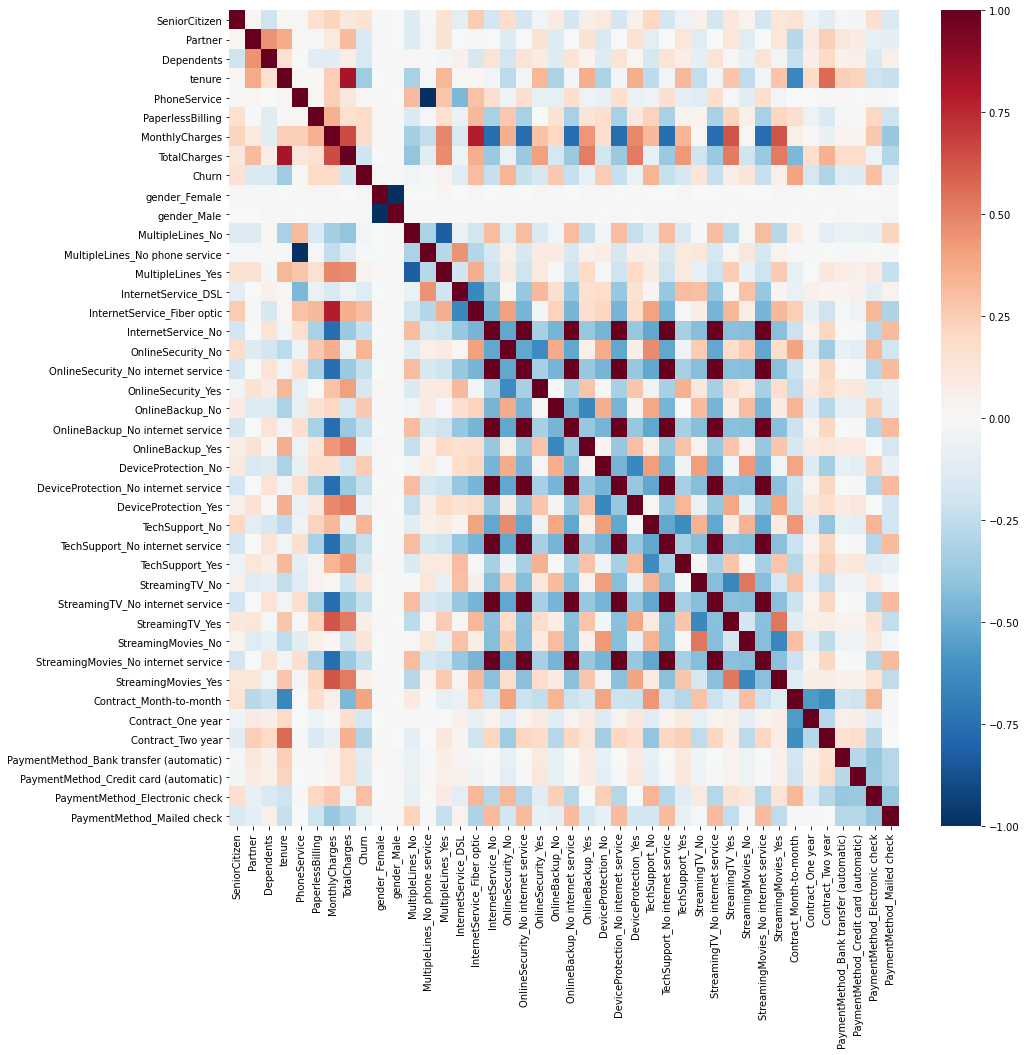

In [28]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(15, 15))
ax = heatmap(df.corr(),cmap="RdBu_r")

Função para selecionar colunas com alta correlação entre si. Uma dessas colunas será dropada, já que não trás informação adicional ao modelo e aumenta a dimensão do mesmo


In [29]:
def correlated_columns(df, threshold):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )

In [30]:
correlated_columns(df[df.columns[1:]],0.95)

,level_0,level_1,pearson
0,gender_Male,gender_Female,-1.00
1,MultipleLines_No phone service,PhoneService,-1.00
17,StreamingMovies_No internet service,InternetService_No,1.00
18,StreamingMovies_No internet service,OnlineSecurity_No internet service,1.00
19,StreamingMovies_No internet service,OnlineBackup_No internet service,1.00
20,StreamingMovies_No internet service,DeviceProtection_No internet service,1.00
21,StreamingMovies_No internet service,TechSupport_No internet service,1.00
22,StreamingMovies_No internet service,StreamingTV_No internet service,1.00


Deletando level1 features

In [31]:
df = df.drop(['gender_Female','PhoneService','InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service'],axis=1)

In [32]:
correlated_columns(df[df.columns[1:]],0.95)

,level_0,level_1,pearson


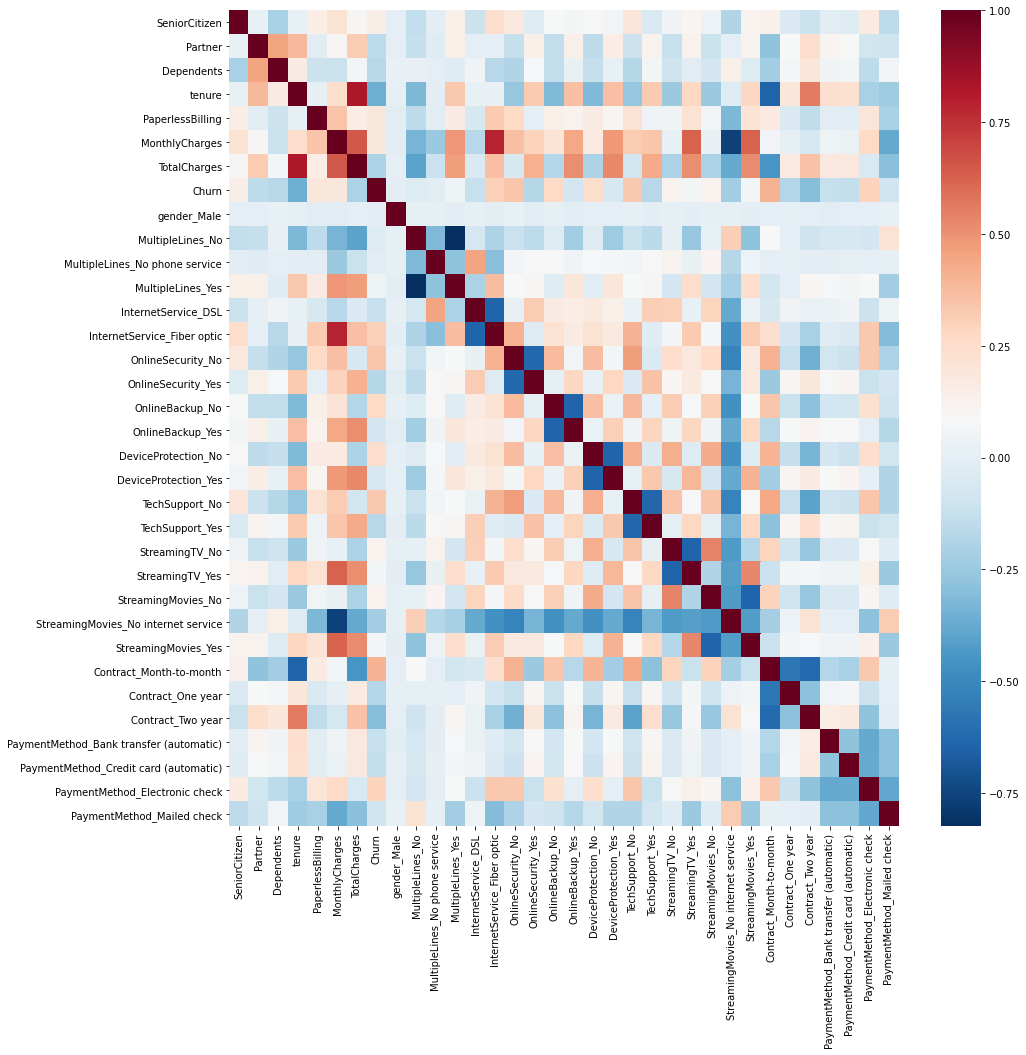

In [33]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(15, 15))
ax = heatmap(df.corr(),cmap="RdBu_r")

In [37]:
# Salvando a base após ajustes
df.to_csv('Telco-Customer-Churn_preprocessed.csv',index=False)